# 📚 Imports
---

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 📖 Data
---

In [95]:
df = pd.read_csv('data/SuicideChina.csv')
df.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [97]:
# Checking null values
df.isna().sum()

Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

In [98]:
# Drop unnecessary columns
df.drop(['Unnamed: 0', 'Person_ID'], axis = 1, inplace = True)

In [99]:
# Columns Value Count
print(df['Hospitalised'].value_counts())
print('-'*30)
print(df['Died'].value_counts())
print('-'*30)
print(df['Urban'].value_counts())
print('-'*30)
print(df['Education'].value_counts())
print('-'*30)
print(df['Occupation'].value_counts())
print('-'*30)
print(df['method'].value_counts())

yes    1553
no     1018
Name: Hospitalised, dtype: int64
------------------------------
no     1315
yes    1256
Name: Died, dtype: int64
------------------------------
no         2213
yes         277
unknown      81
Name: Urban, dtype: int64
------------------------------
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64
------------------------------
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64
------------------------------
Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64


# 📊 Visualization 

## All columns compared with Age

In [100]:
def plots(df, x):
    plt.style.use('dark_background')
    f, ax = plt.subplots(1, 2, figsize = (25, 10))
    Group_data = df.groupby(x)
    sns.barplot(x = Group_data['Age'].mean().index, y = Group_data['Age'].mean().values, ax = ax[0], palette = 'viridis')
    
    for container in ax[0].containers:
        ax[0].bar_label(container, color = 'white', size = 20)

    palette_color = sns.color_palette('viridis')
    plt.pie(x = df[x].value_counts(),
            labels = df[x].value_counts().index,
            autopct = '%.0f%%',
            shadow = True,
            colors = palette_color)
    plt.suptitle(x, fontsize = 25)
    plt.show()

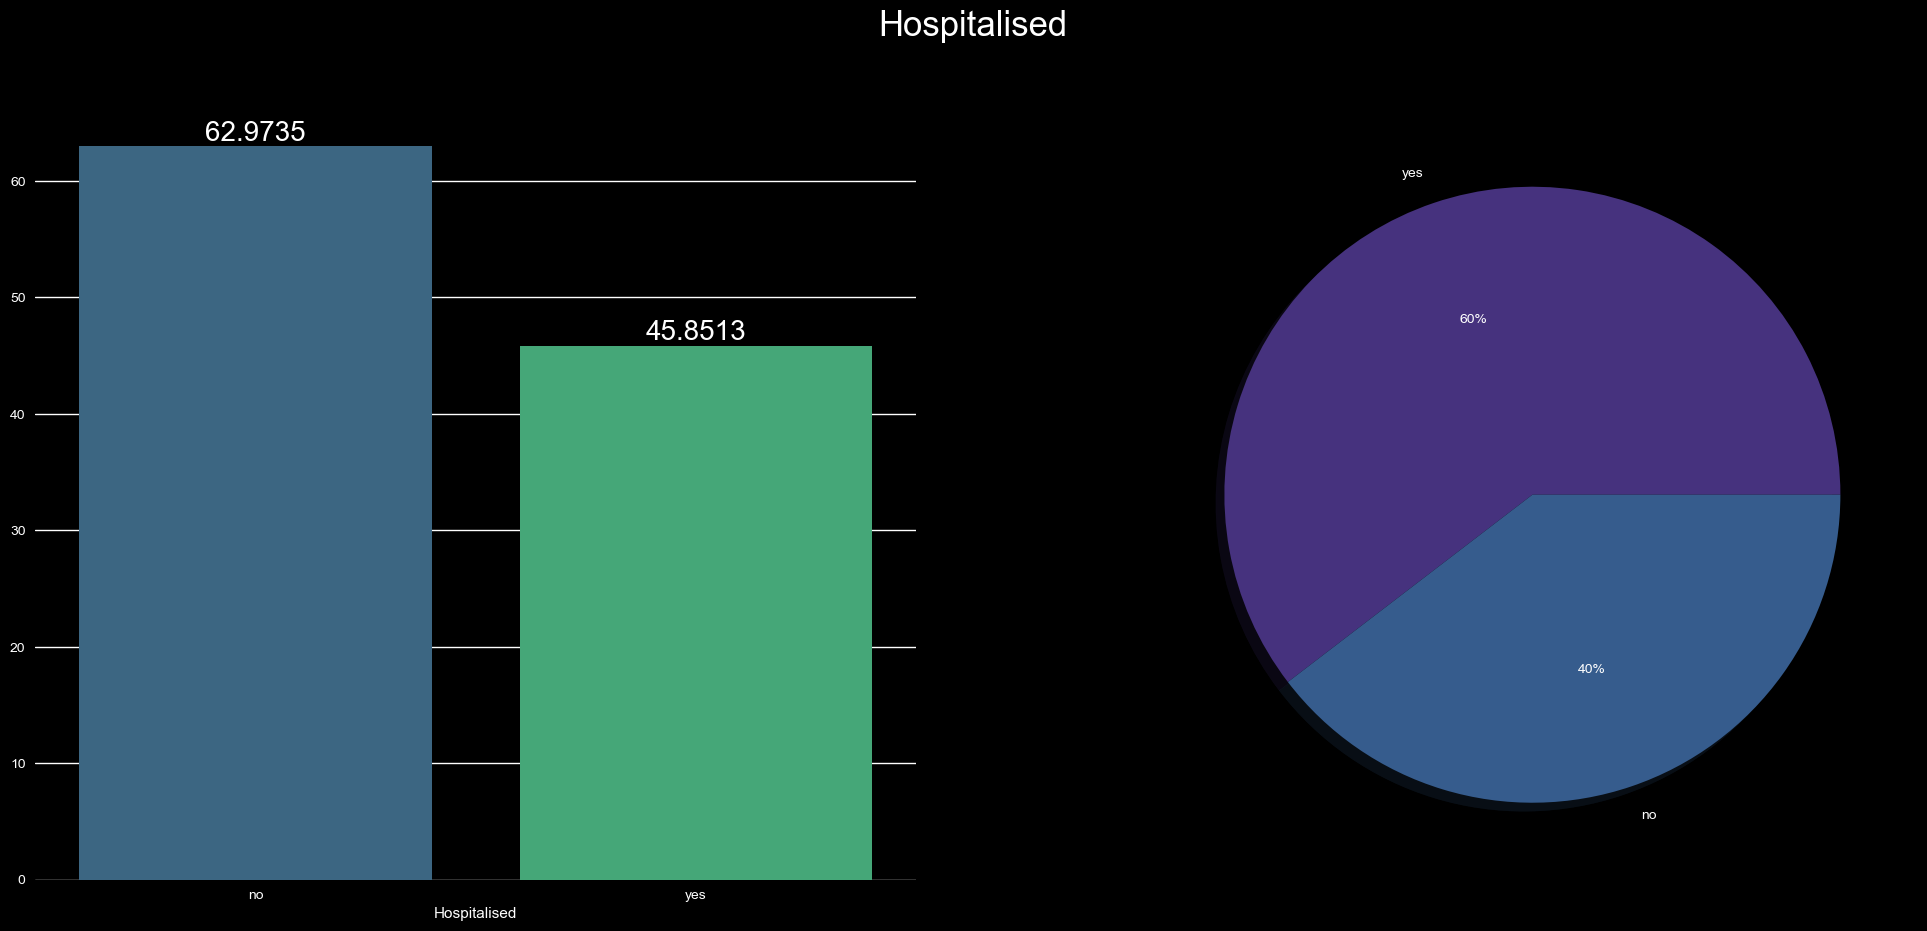

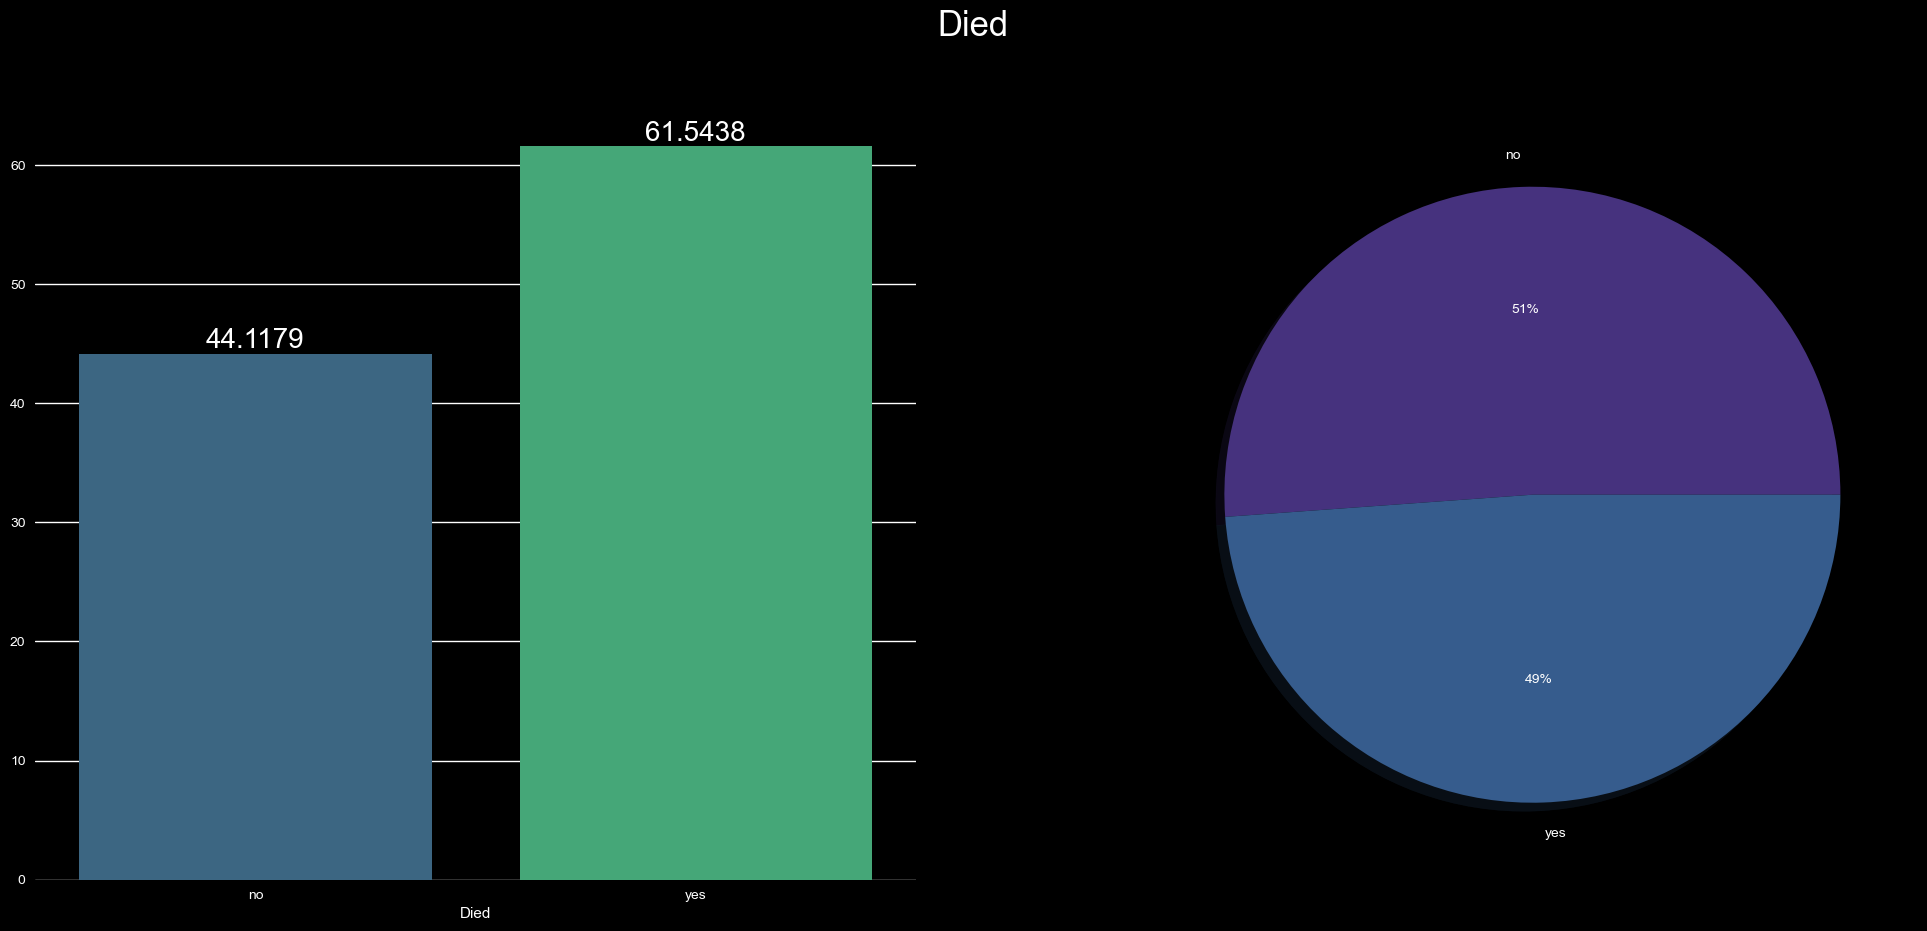

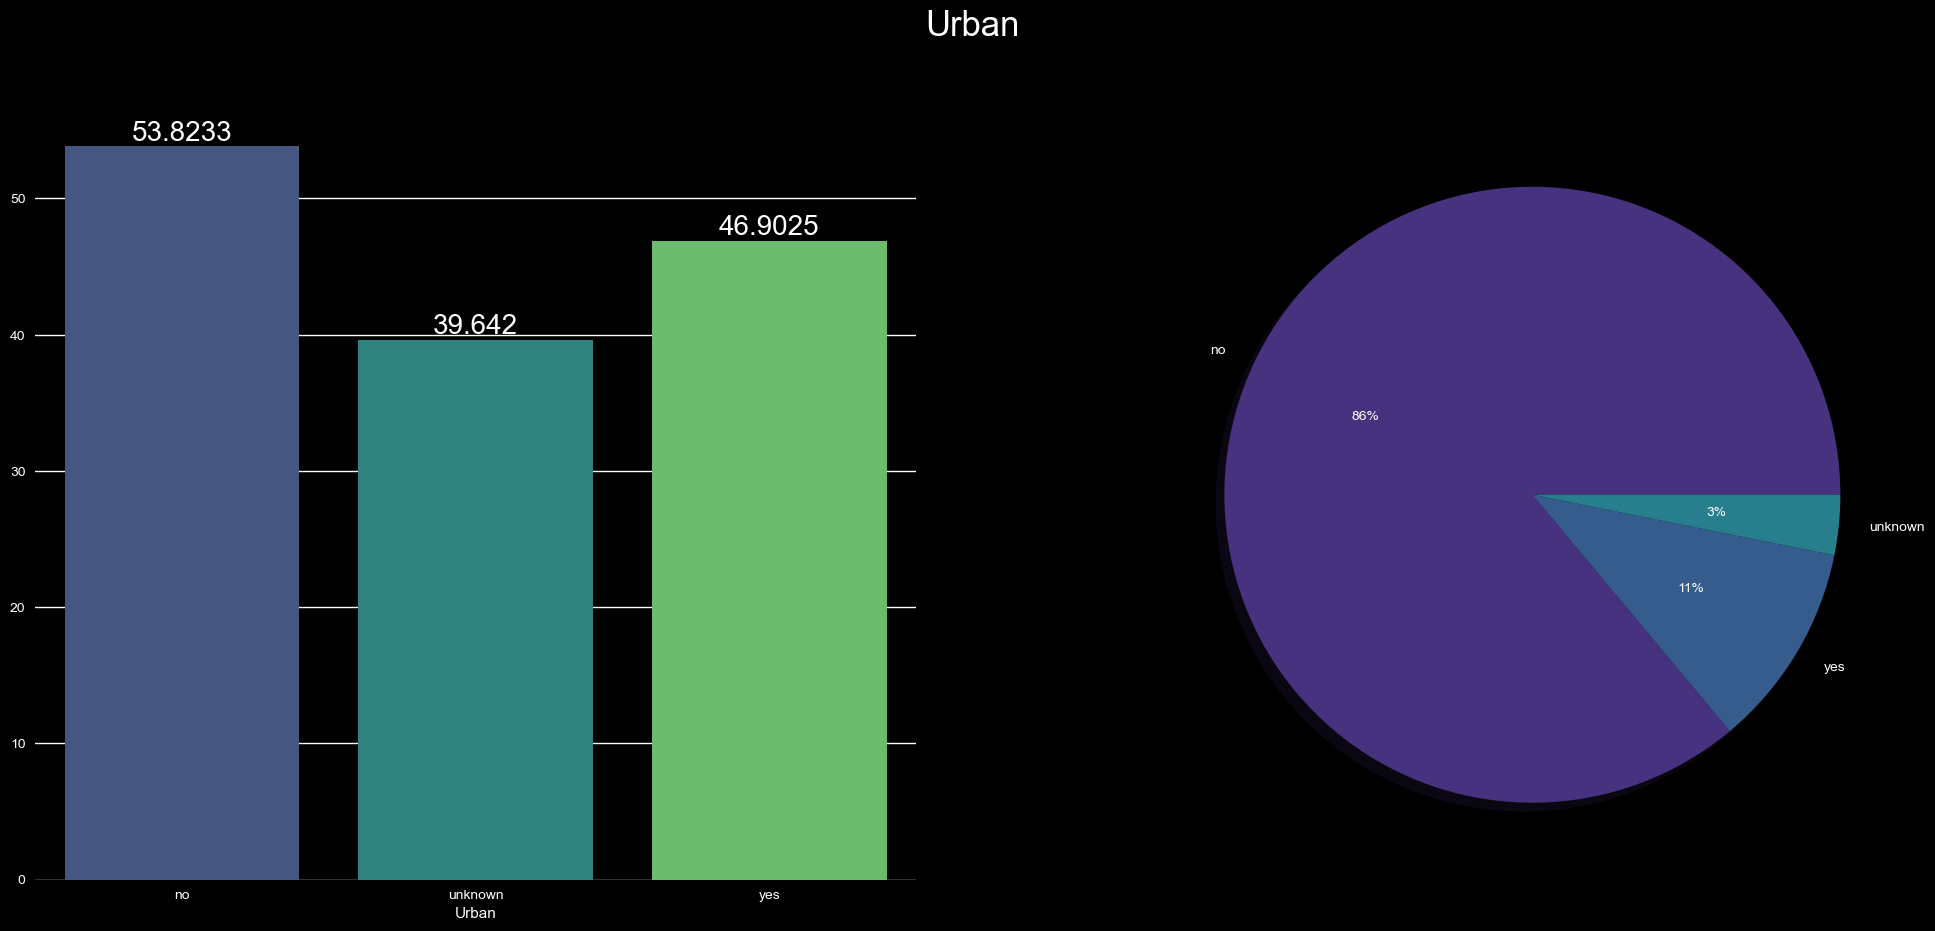

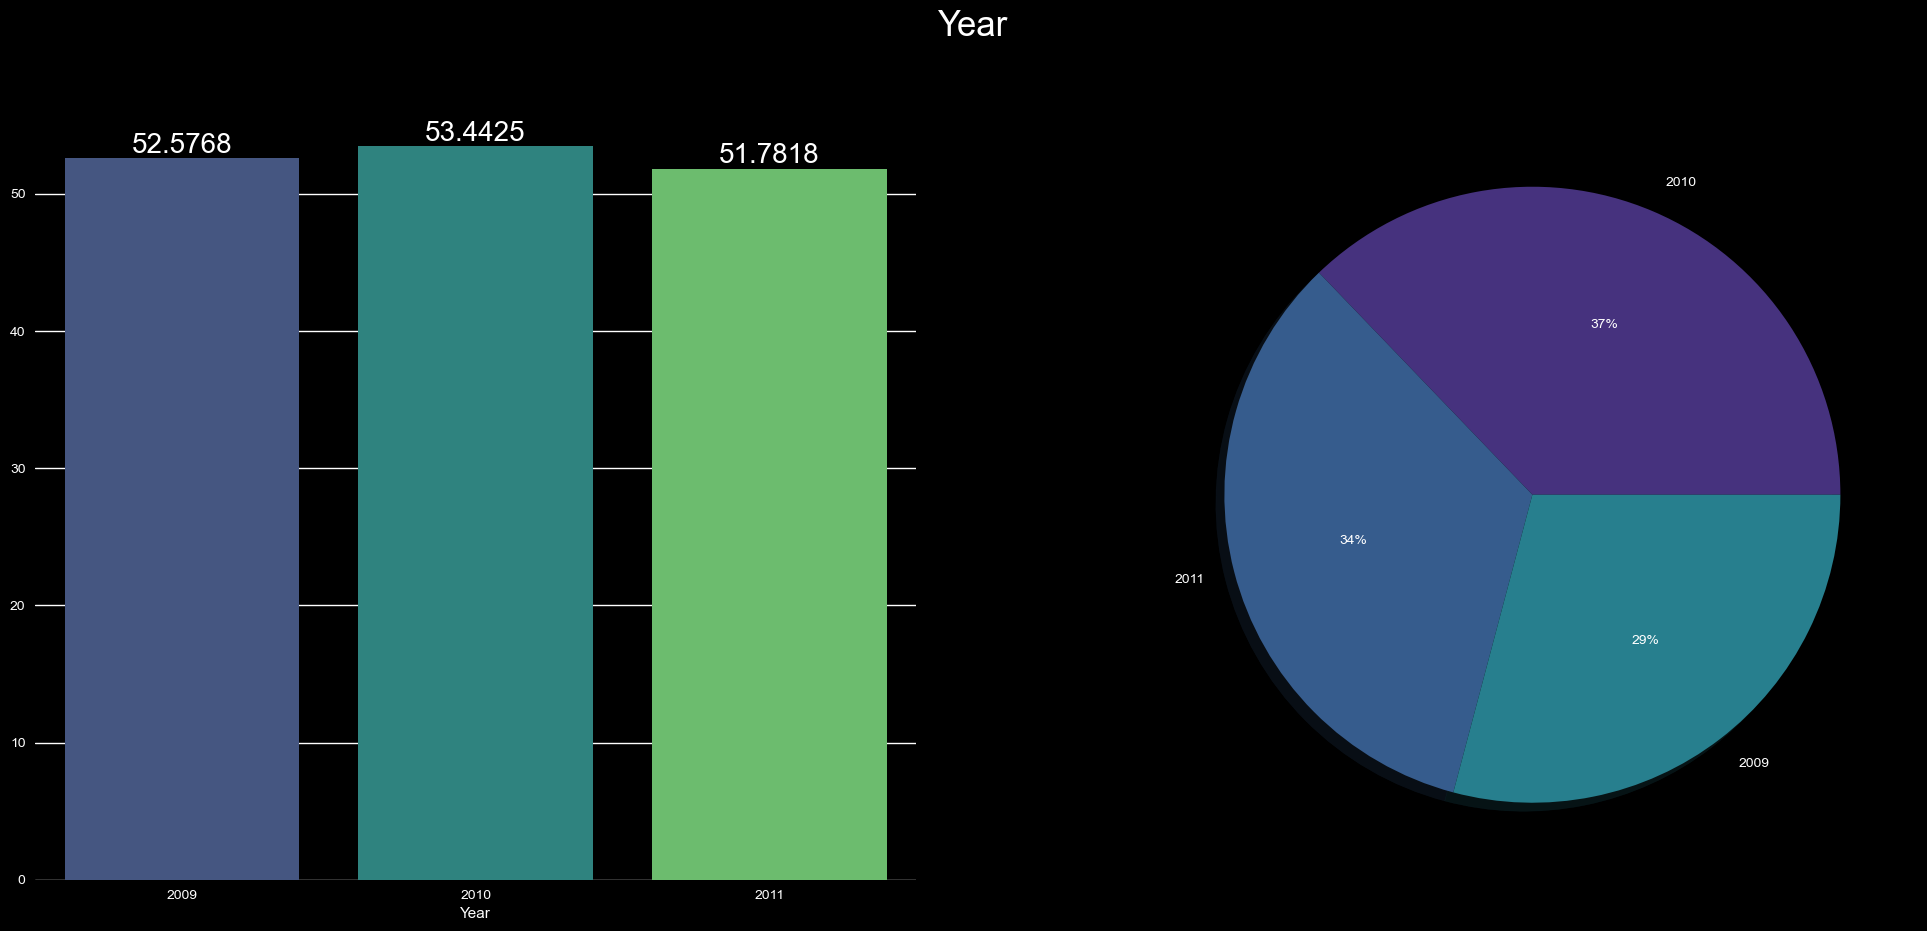

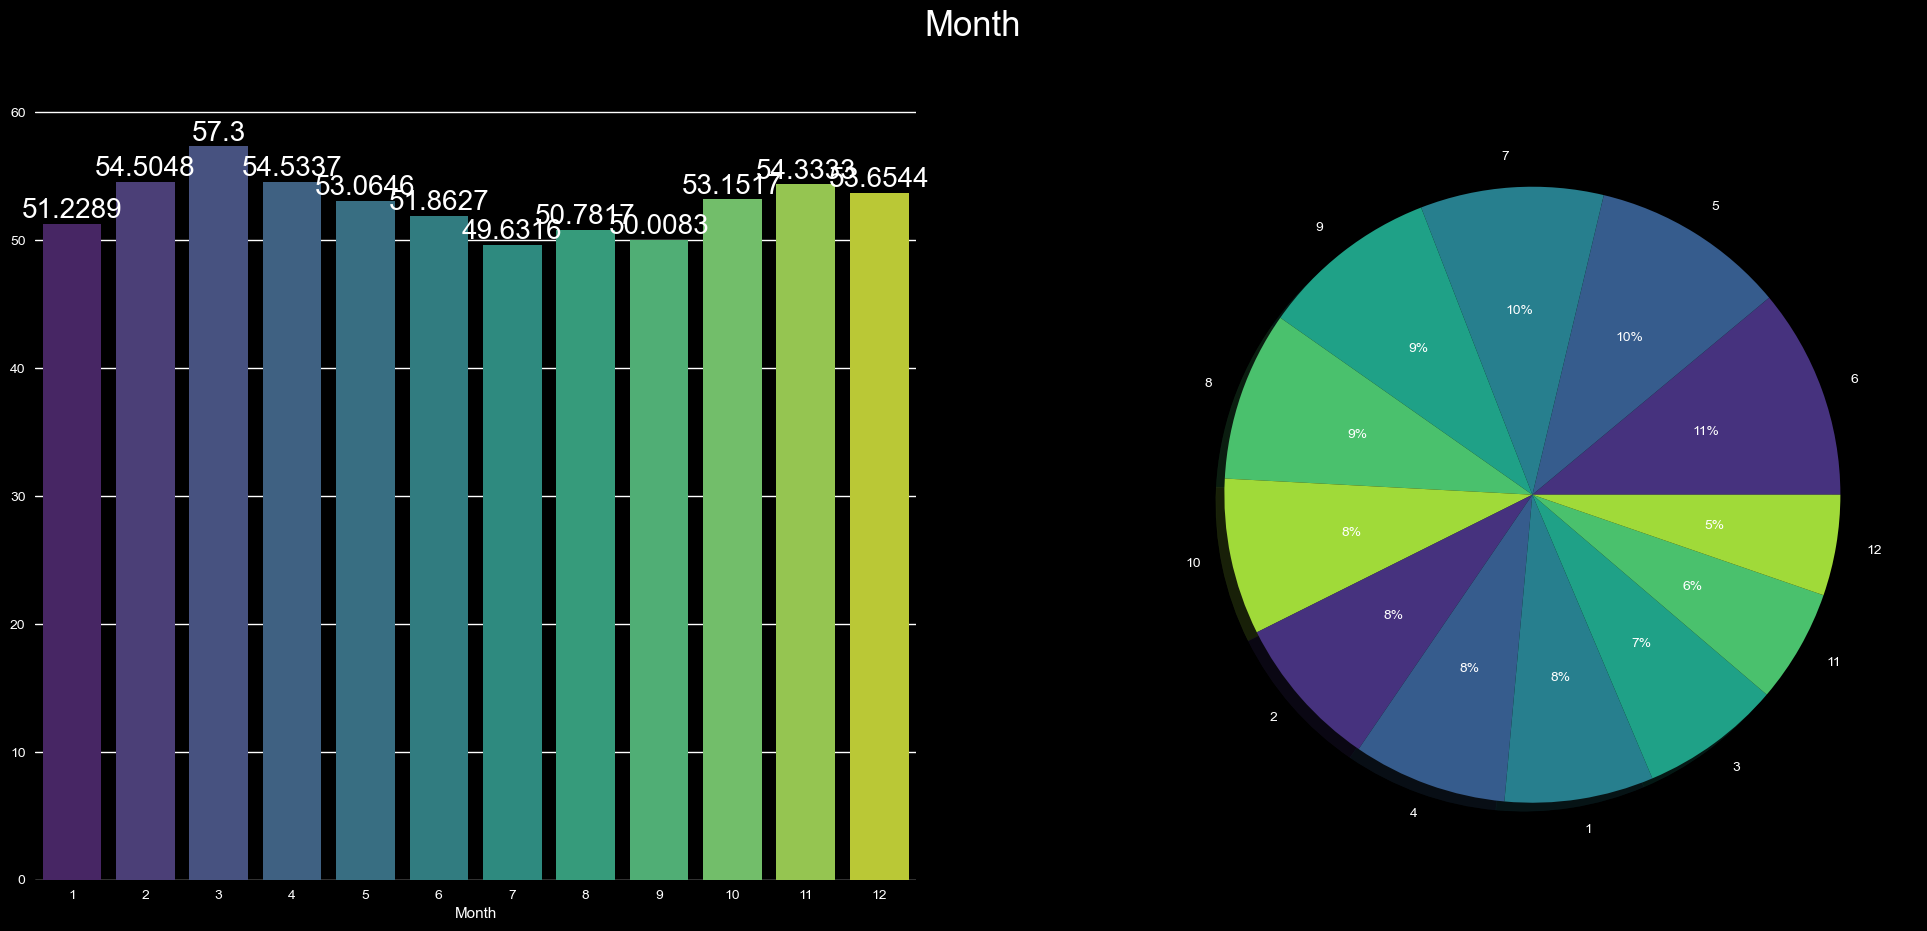

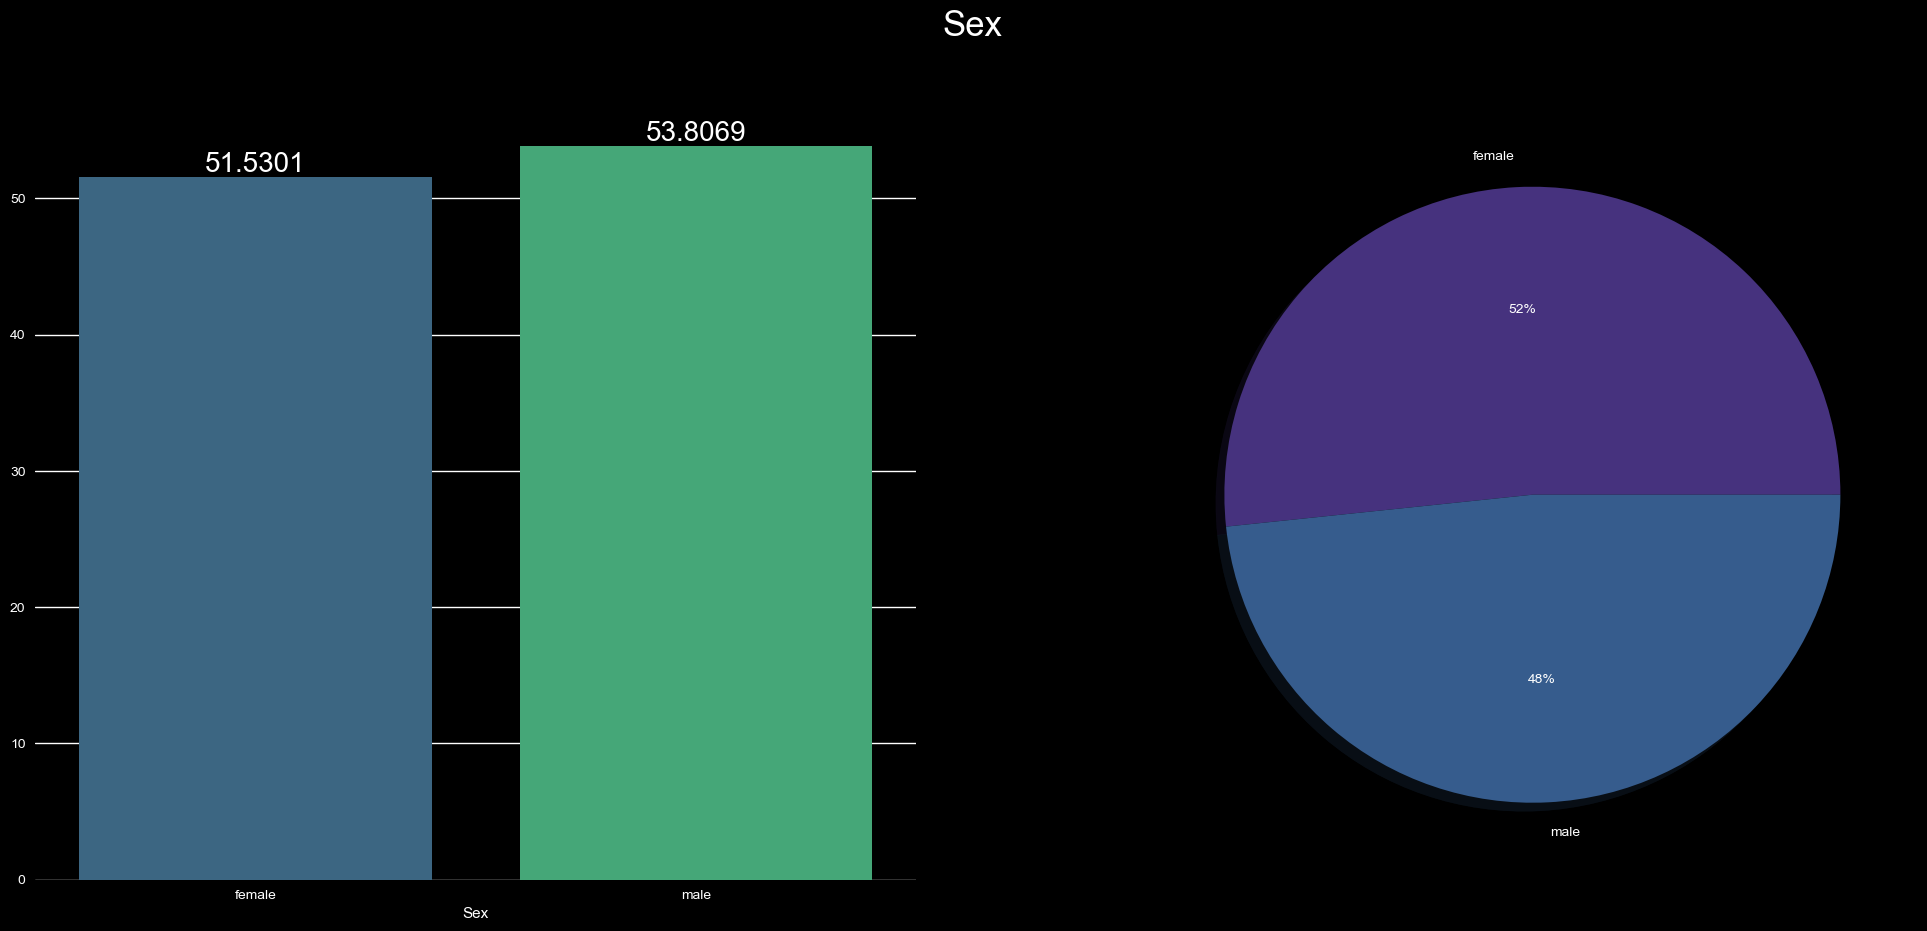

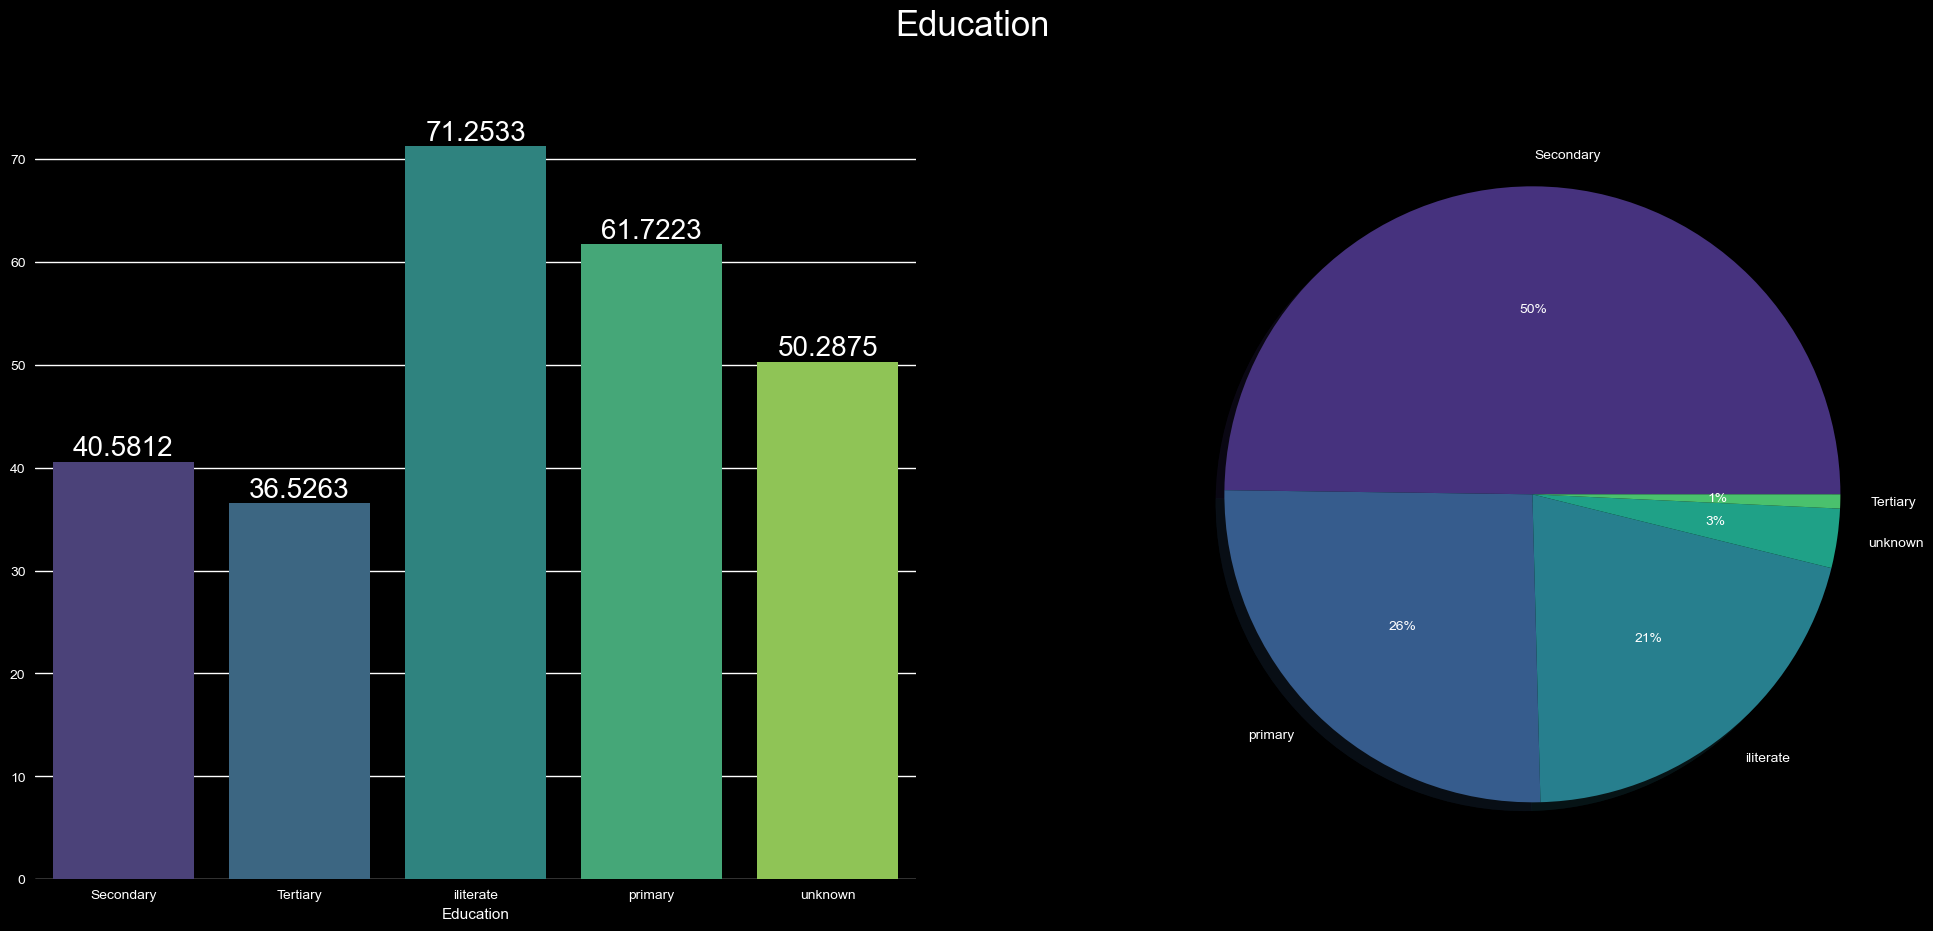

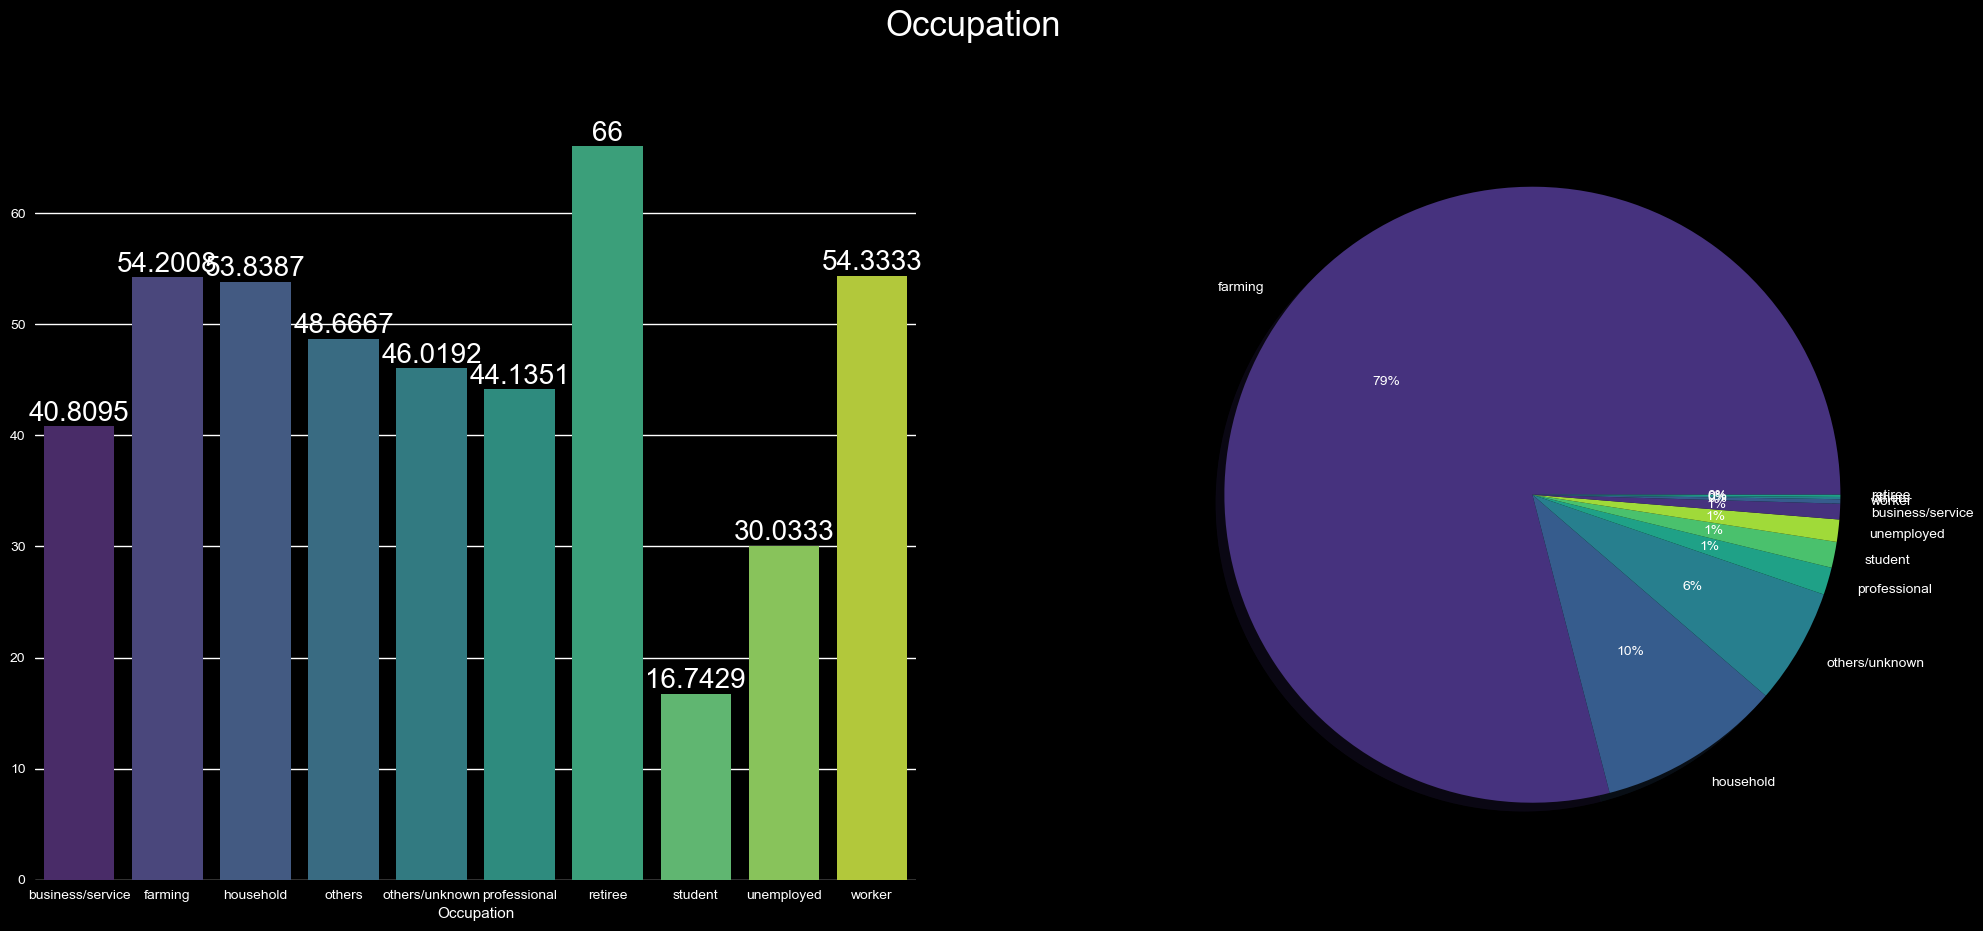

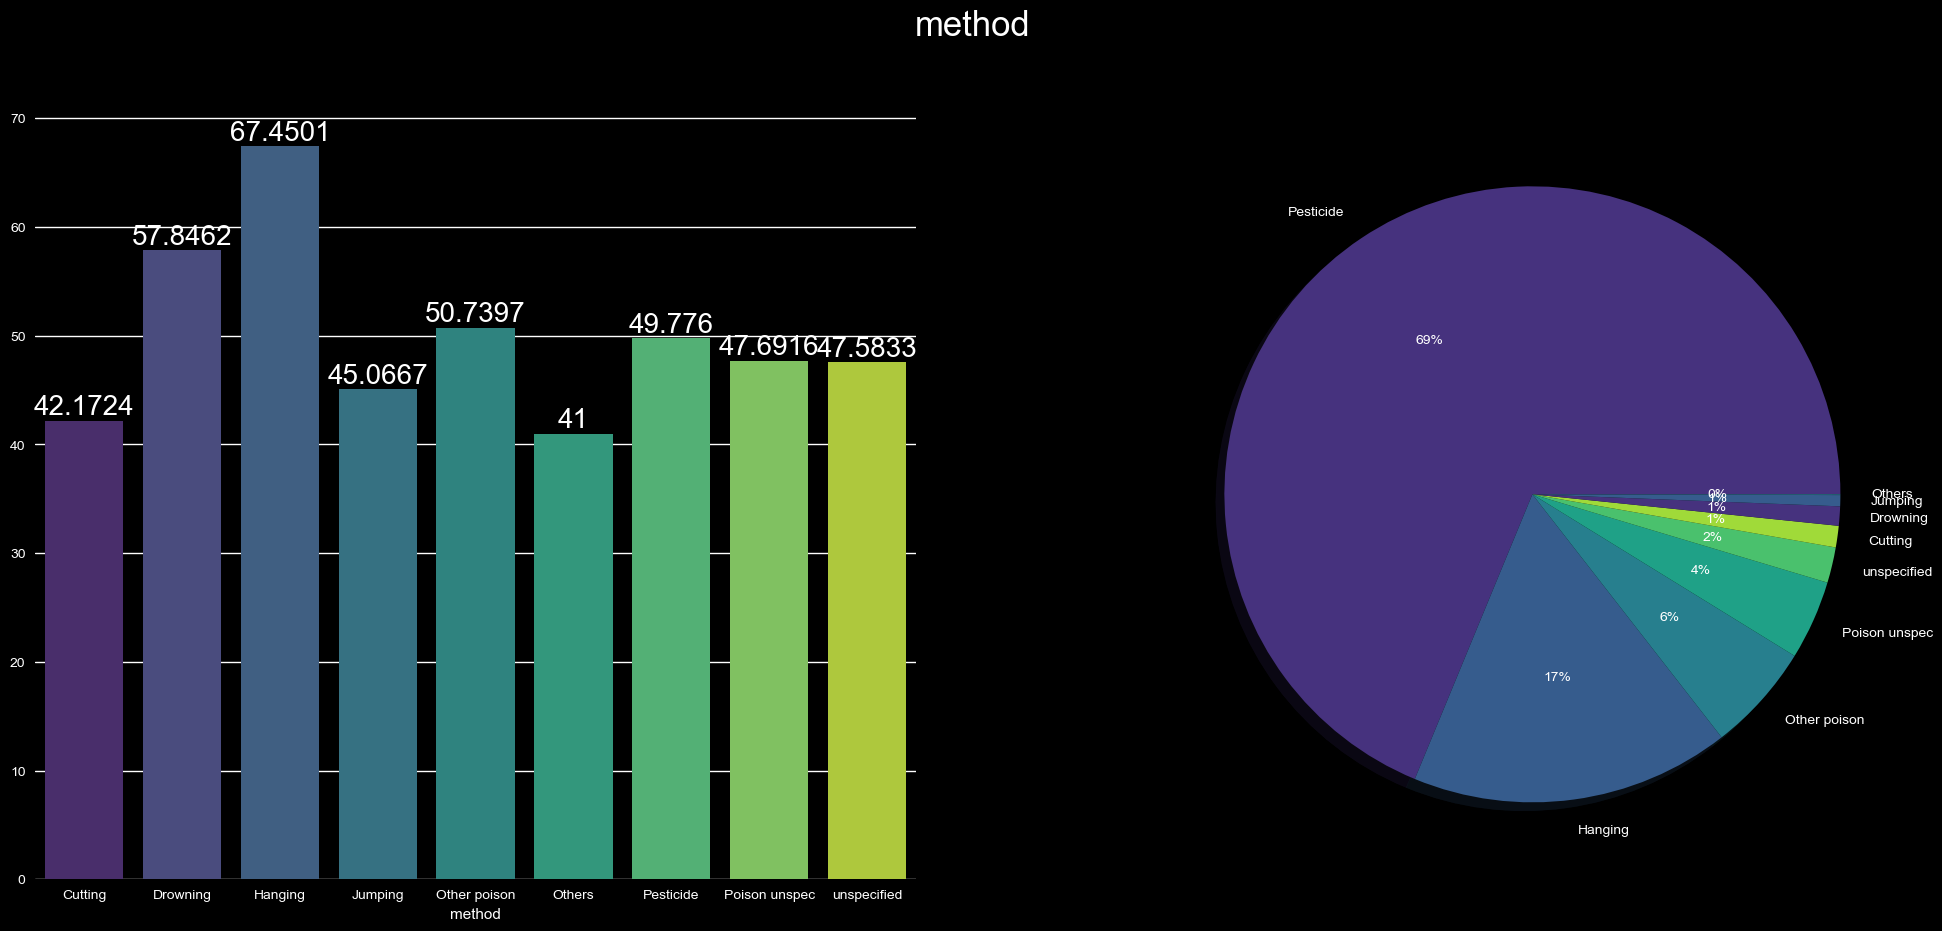

In [101]:
for i in df.columns:
    if i != 'Age':
        plots(df, i)

## Values Distribuition

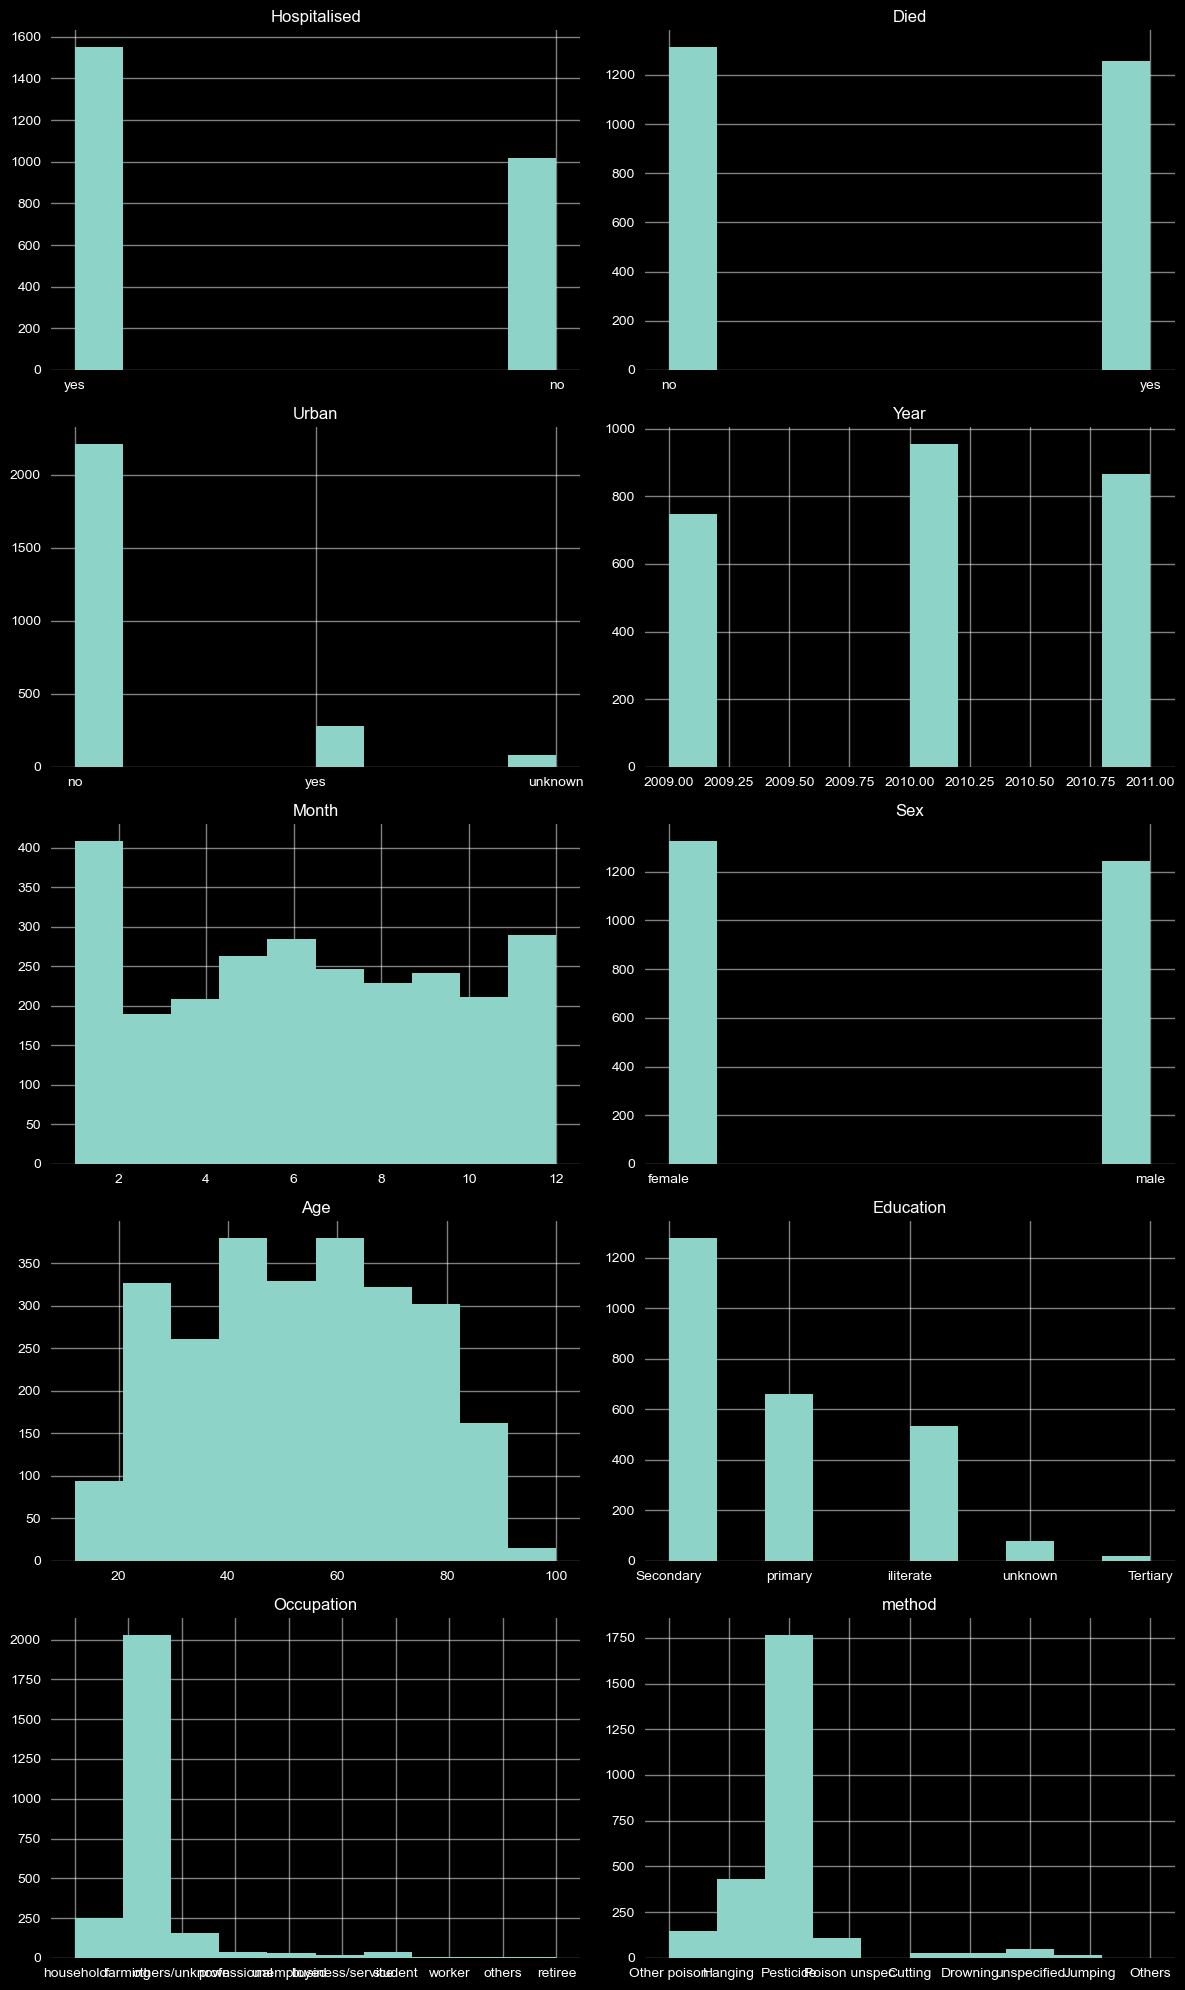

In [102]:
plt.style.use('dark_background')
plt.figure(figsize = (12,20))

list_columns = list(df.columns)

for i in range(len(list_columns)):
    plt.subplot(5, 2, i + 1)
    plt.title(list_columns[i])
    plt.hist(df[list_columns[i]])
    plt.grid(alpha = 0.5)
    
plt.tight_layout()

## Values Distribuition Compared with Died

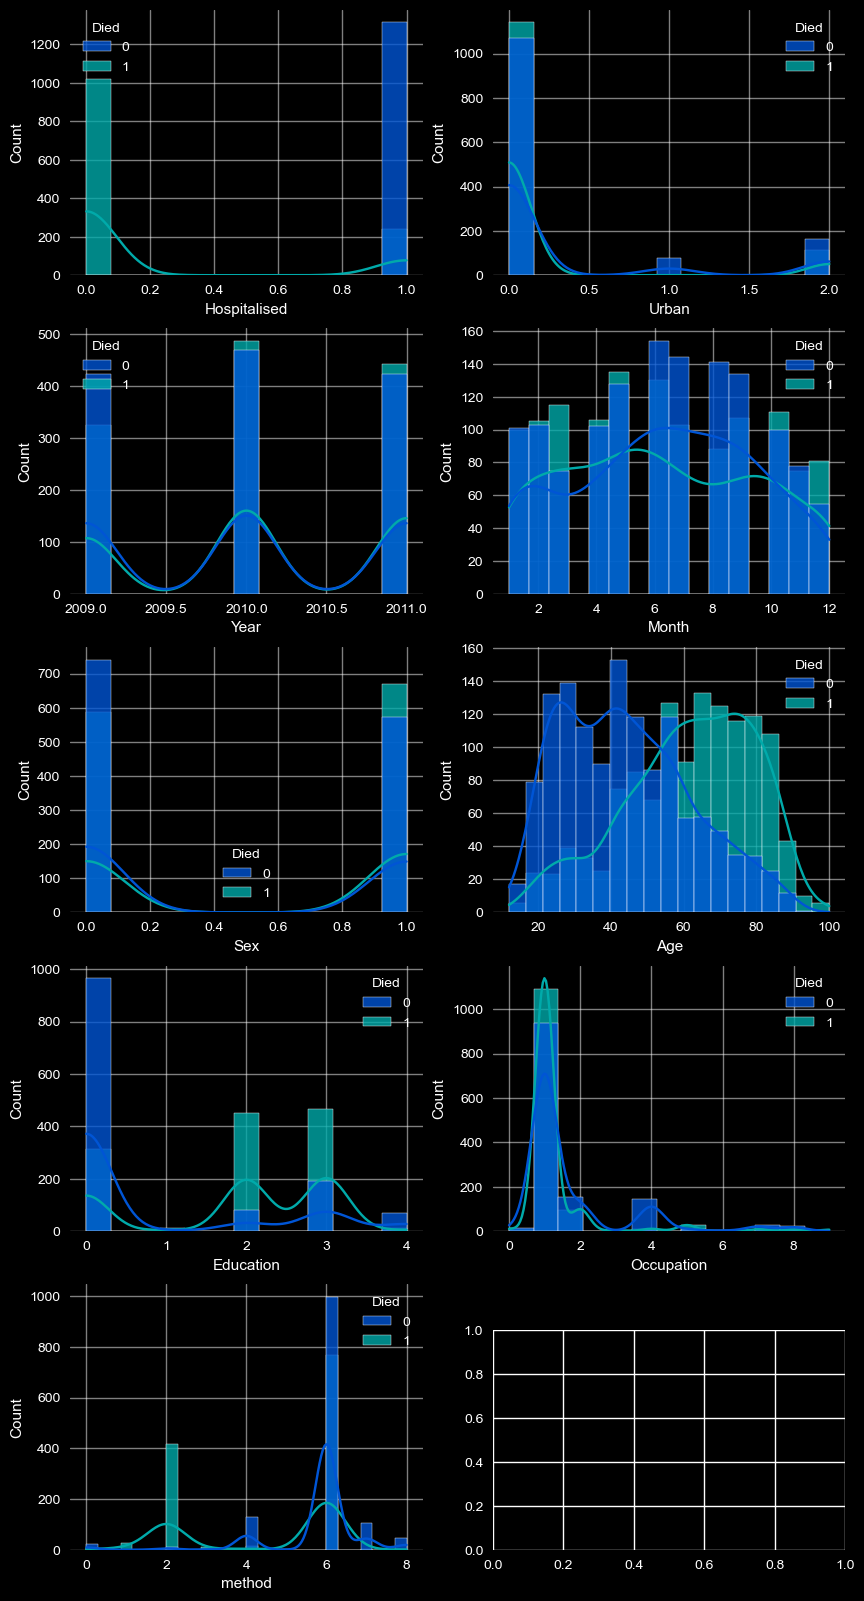

In [122]:
plt.style.use('dark_background')

fig, axs = plt.subplots(6, 2, figsize = (10, 20))
i = 1
for feature in df.columns:
    if feature not in ['Died'] and i < 14:
        plt.subplot(5, 2, i)
        sns.histplot(data = df, x = feature,
                     kde = True, palette = 'winter', 
                     hue = 'Died', alpha = 0.8)
        plt.grid(alpha = 0.5)
        i += 1

## Died by Month

<AxesSubplot:xlabel='Died', ylabel='Month'>

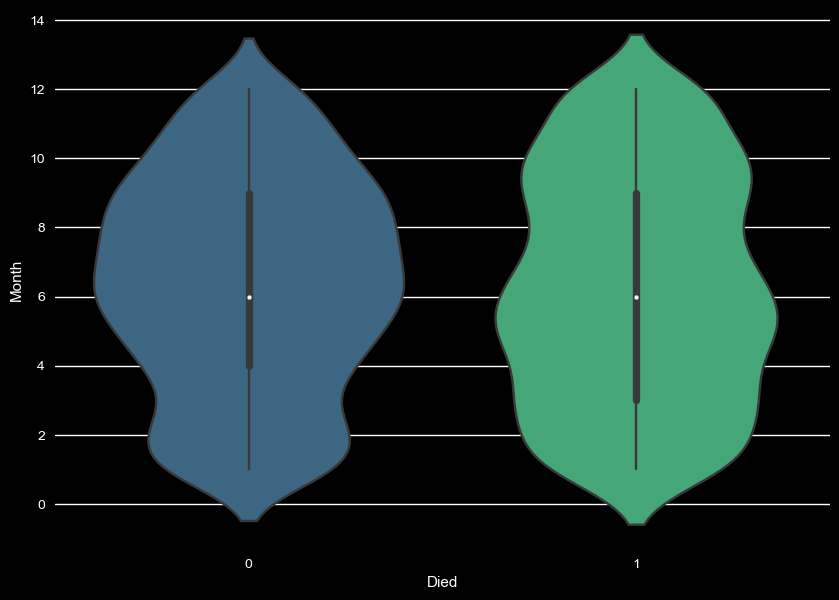

In [136]:
plt.figure(figsize = (10, 7))
plt.style.use('dark_background')

sns.violinplot(x = 'Died', y = 'Month', data = df, palette = 'viridis')

## Age Compared to Month of Occurrence

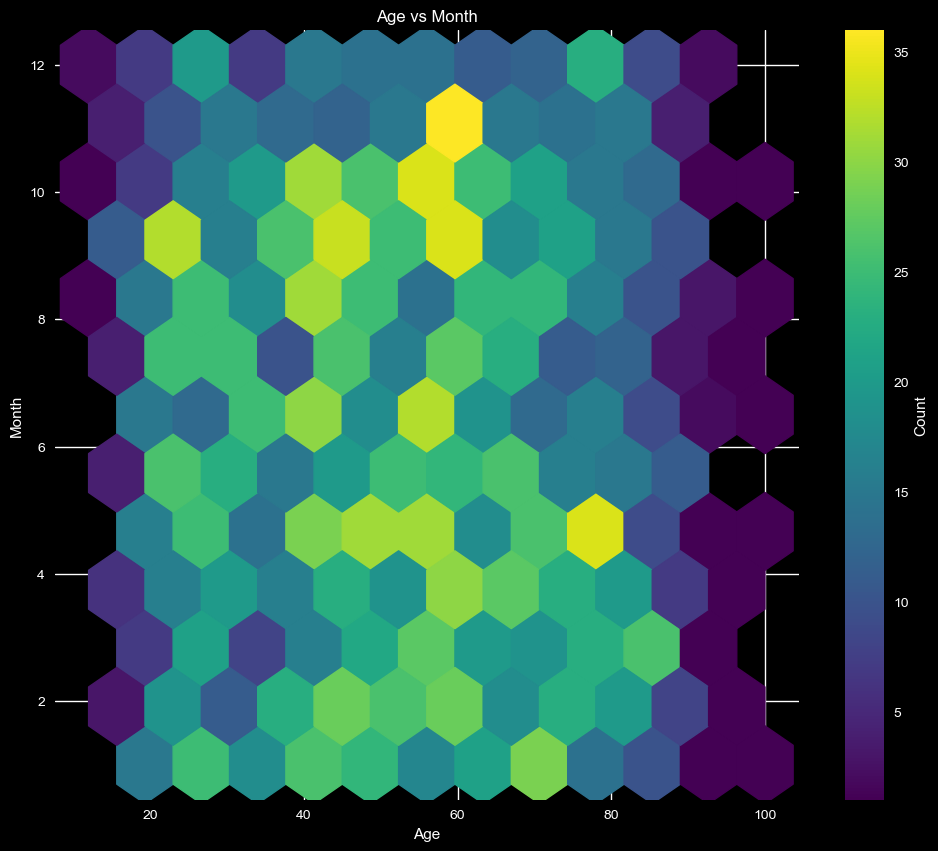

In [104]:
plt.style.use('dark_background')
plt.figure(figsize = (12, 10))

plt.hexbin(df['Age'], df['Month'], gridsize = 12, cmap = 'viridis', mincnt = 1)
plt.colorbar(label = 'Count')
plt.xlabel('Age')
plt.ylabel('Month')
plt.title('Age Compared to Month of Occurrence')
plt.show()

## Age Compared to Year of Occurrence

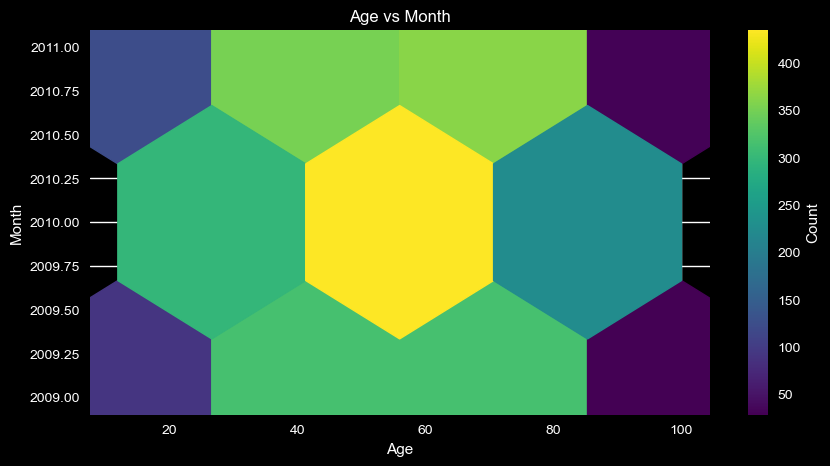

In [131]:
plt.style.use('dark_background')
plt.figure(figsize = (10, 5))

plt.hexbin(df['Age'], df['Year'], gridsize = 3, cmap = 'viridis', mincnt = 1)
plt.colorbar(label = 'Count')
plt.xlabel('Age')
plt.ylabel('Year')
plt.title('Age Compared to Year of Occurrence')
plt.show()

## Converting object values to numeric for correlation

In [106]:
list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

## Correlation

<AxesSubplot:>

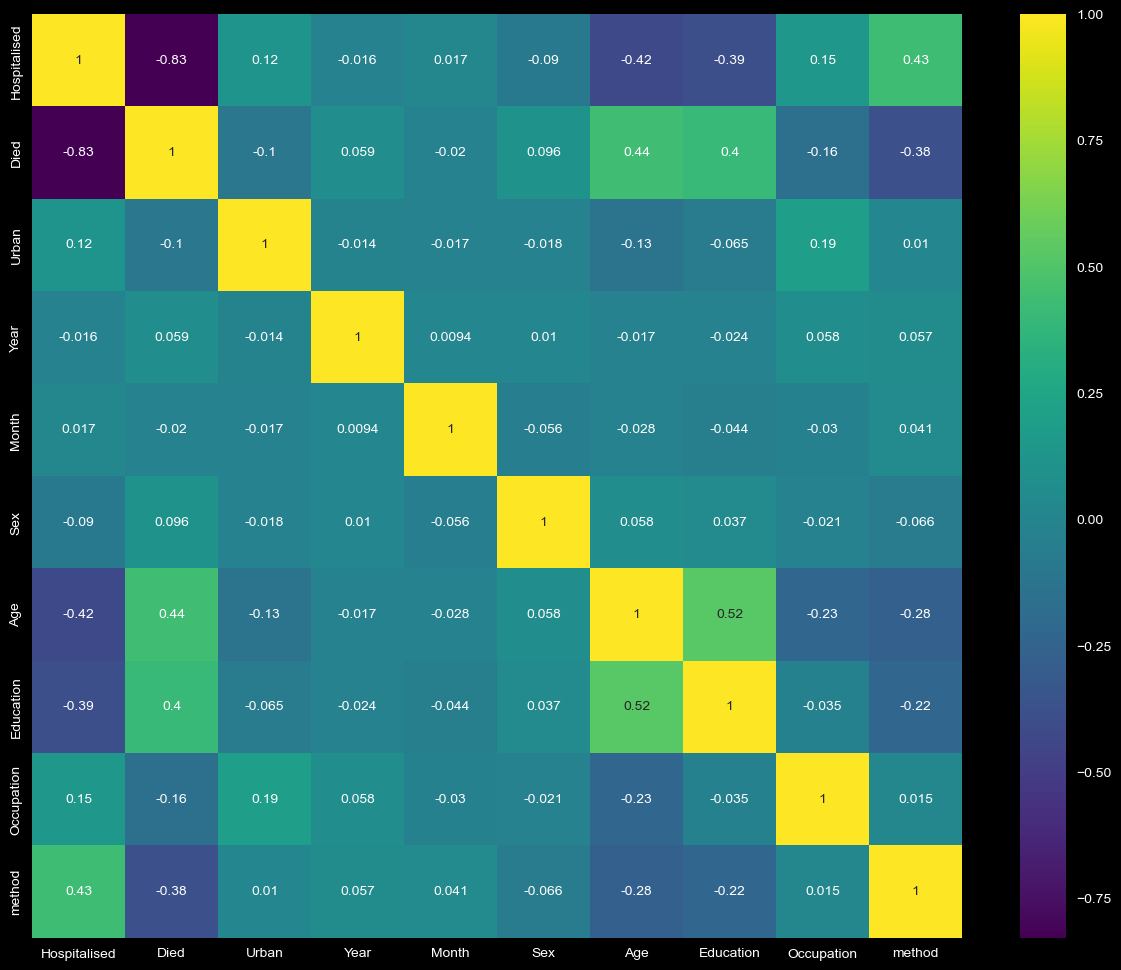

In [107]:
plt.figure(figsize = (15, 12))
plt.style.use('dark_background')
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

# 😁 Thank you! Feel free to criticize! 👋🏼